다변량 선형 회귀 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    # 시각화를 위하여 Seaborn 라이브러리를 이용함

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')
life.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
print(life.shape)
print(life.isnull().sum())


(2938, 22)
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult mortality                     10
Infant deaths                        0
Alcohol                            194
Percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 1-19 years                 34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [3]:
life.dropna(inplace = True)
print(life.shape)

(1649, 22)


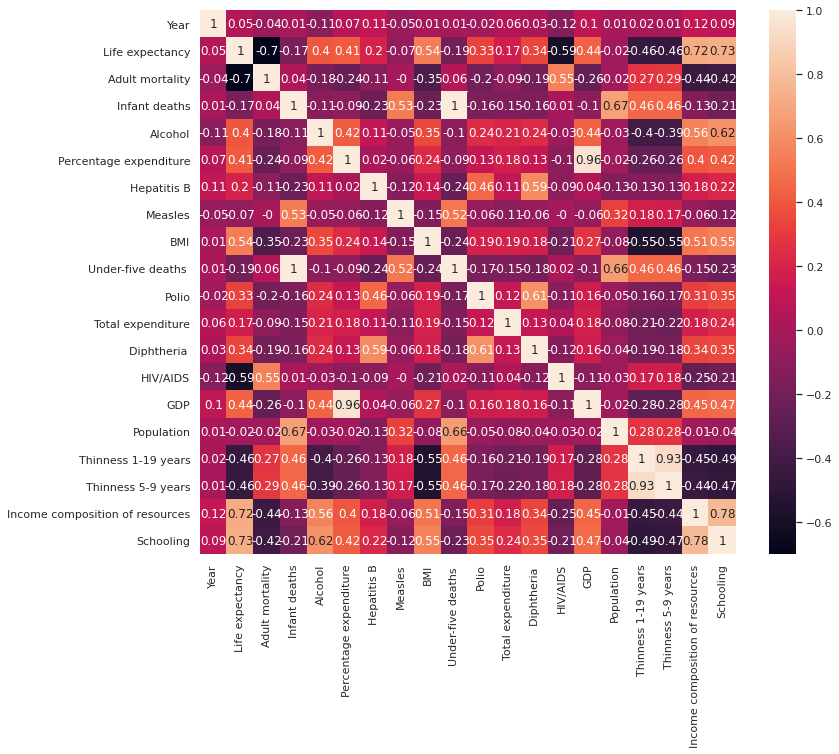

In [4]:
sns.set(rc={'figure.figsize':(12,10)})    # 상관행렬 가시
correlation_matrix = life.corr().round(2) # 상관행렬 생성
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()  

In [5]:
X = life[['Alcohol', 'Percentage expenditure', 'Polio',
         'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']
print(X)
print(y)

      Alcohol  Percentage expenditure  ...         GDP  Thinness 1-19 years
0        0.01               71.279624  ...  584.259210                 17.2
1        0.01               73.523582  ...  612.696514                 17.5
2        0.01               73.219243  ...  631.744976                 17.7
3        0.01               78.184215  ...  669.959000                 17.9
4        0.01                7.097109  ...   63.537231                 18.2
...       ...                     ...  ...         ...                  ...
2933     4.36                0.000000  ...  454.366654                  9.4
2934     4.06                0.000000  ...  453.351155                  9.8
2935     4.43                0.000000  ...   57.348340                  1.2
2936     1.72                0.000000  ...  548.587312                  1.6
2937     1.68                0.000000  ...  547.358879                 11.0

[1649 rows x 6 columns]
0       65.0
1       59.9
2       59.9
3       59.5
4       59.

In [8]:
from sklearn.model_selection import train_test_split
 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2) 


In [9]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

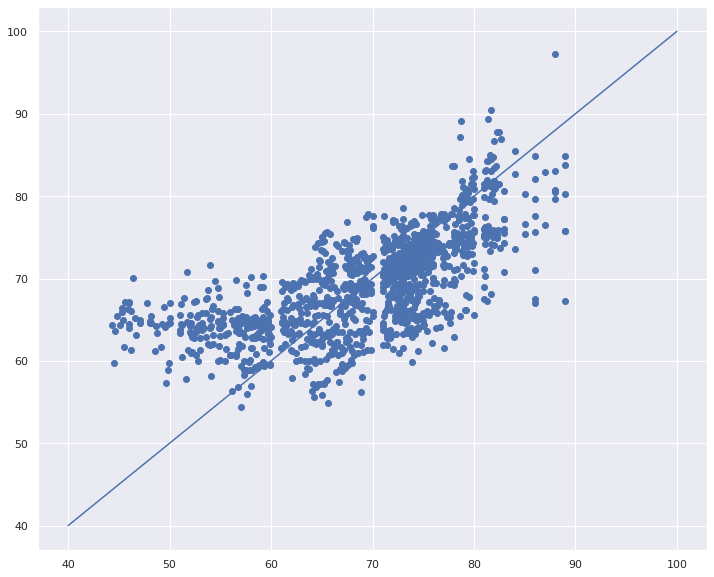

In [10]:
y_hat_train = lin_model.predict(X_train)
plt.scatter(y_train, y_hat_train)
xy_range = [40, 100]
plt.plot(xy_range, xy_range)

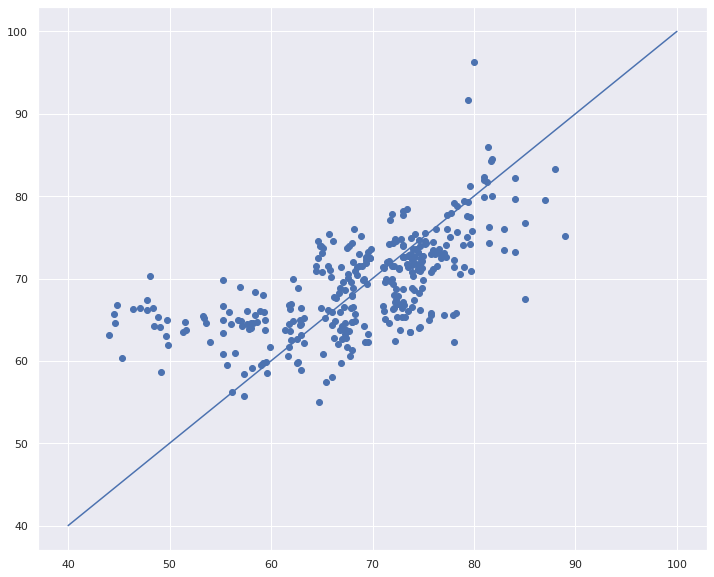

In [11]:
y_hat_test = lin_model.predict(X_test)
plt.scatter(y_test, y_hat_test)
plt.plot(xy_range, xy_range)